# Pruebas

+ En las definiciones de las funciones en LennardGas ya no se suponen valores predeterminados para los parámetros, siempre hay que darlos explicitamente para realizar pruebas.

In [2]:
using PyCall, PyPlot , Distributions
@pyimport matplotlib.animation as anim

In [3]:
push!(LOAD_PATH, pwd()*"/src")
using LennardGas

In [136]:
function comparador(raiz_cub_part::Int64, pasos::Int64)
    #Parámetros
    @show r_c = 2.5
    @show L   = r_c * 10
    @show cajitas = 2^60
    @show h = 0.005

    # Incrementando las partículas se nota que los "arboles" sí funcionan.
    @show particulas = raiz_cub_part^3

    # Condicion inicial (en Float64)
    inicial = cubito(raiz_cub_part, [L/2,L/2,L/2], L/6)
    segundo = fluctuacion_gaussiana(inicial, L, 0.0, 0.1)

    # Condición inicial (en Int64)
    X0 = flotante_a_entero(inicial, L, cajitas)
    X1 = flotante_a_entero(segundo, L, cajitas)

    @time tesla = evolucion(X0, X1, pasos, L, cajitas, r_c, h)
    @time clasi = evolucion_clasica(X0, X1, pasos, L, cajitas, r_c, h)

    a,b = size(tesla)
    fail = false
    for k in eachindex(tesla)
        diff = tesla[k] - clasi[k]
        if diff != 0
            r = mod1(k, a)
            c = mod1(k, b)
            println(r, " ", c," ",ceil(tesla[k] * 10.0 / cajitas))
            fail = true
        end
    end
    fail ? println("Algo anda mal...") : println("Todo salió bien")
end

comparador (generic function with 1 method)

In [201]:
raiz_cubica_particulas = 2
pasos_temporales = 8
comparador(raiz_cubica_particulas, pasos_temporales)

r_c = 2.5 = 2.5
L = r_c * 10 = 25.0
cajitas = 2 ^ 60 = 1152921504606846976
h = 0.005 = 0.005
particulas = raiz_cub_part ^ 3 = 8
  0.002408 seconds (2.80 k allocations: 156.203 KB)
  0.000205 seconds (2.52 k allocations: 49.500 KB)
10 10 6.0
10 20 5.0
10 6 5.0
10 16 6.0
10 2 4.0
10 12 6.0
Algo anda mal...


### Distribución inicial cúbica

In [229]:
pasos = 20
L = 25.0
cajitas = 2^60

# Incrementando las partículas se nota que los "arboles" sí funcionan.
raiz_cub_part = 3 
@show particulas = raiz_cub_part^3

#Condicion inicial (en Float64)
inicial = cubito(raiz_cub_part, [L/2,L/2,L/2], L/4)
segundo = fluctuacion_gaussiana(inicial, 0.0, 0.1)

#Condición inicial (en Int64)
X0 = flotante_a_entero(inicial, L, cajitas)
X1 = flotante_a_entero(segundo, L, cajitas)
@time registro = evolucion(X0, X1, pasos, L, cajitas, r_c, h);

particulas = raiz_cub_part ^ 3 = 27


LoadError: LoadError: InexactError()
while loading In[229], in expression starting on line 15

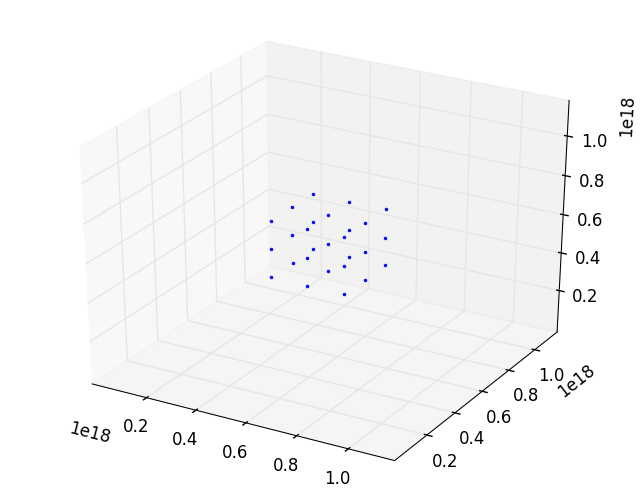

(1,1152921504606846976)

In [33]:
tiempo_inicial = 1
fotograma(registro, tiempo_inicial; cajitas = 2^60)

**Ejemplo animación:** https://github.com/JuliaLang/IJulia.jl/issues/107

##### Todo en una función: animador

### Animando la ida y la vuelta
*Esto toma mucho tiempo*

**Proyecto gravitacion Capitán Sanders**

Basado en: https://github.com/dpsanders/fisica_computacional/blob/master/como_animar.ipynb